# INTRO

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

from sklearn import preprocessing


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation

In [3]:
# Read and view TR
# dataset = "cup/ML-CUP20-TR.csv"
dataset="/content/drive/My Drive/Machine Learning Project/CUP/data/ML-CUP20-TR.csv"

# Column 0:     ID
# Column 1-10:  inputs
# Column 11-12: target_x target_y
train_names = ["id", "input_1", "input_2", "input_3", "input_4", "input_5", "input_6", "input_7", "input_8", "input_9",
               "input_10", "target_x", "target_y"]
df_train = pd.DataFrame(pd.read_csv(dataset, sep=',', skiprows=7, header=None, names=train_names, index_col=0))

# Store the number of training patterns
n_TR_patterns = len(df_train.index)
print(f'N. rows TR: {n_TR_patterns}\n')

# log.write(f'N. rows TR: {n_TR_patterns}\n')

# print(df_train.head())

# Read and view TS
# dataset = "cup/ML-CUP20-TS.csv"
dataset2="/content/drive/My Drive/Machine Learning Project/CUP/data/ML-CUP20-TS.csv"

# Column 0:    ID
# Column 1-10: inputs
test_names = ["id", "input_1", "input_2", "input_3", "input_4", "input_5", "input_6", "input_7", "input_8", "input_9",
              "input_10"]
df_test = pd.DataFrame(pd.read_csv(dataset2, sep=',', skiprows=7, header=None, names=test_names, index_col=0))

# Store the number of (blind) testing patterns
n_TS_patterns = len(df_test.index)
print(f'N. rows TS: {n_TS_patterns}\n')

N. rows TR: 1524

N. rows TS: 472



In [4]:
# Divide into TR and (internal) TS
attributes = [col for col in df_train.columns if 'input' in col]

# Separating internal TS from the rest of training dataset (Hold out ca. 20%)
print("\ndf_train ", len(df_train))  # 1524

df_subset = df_train.sample(304, random_state=100)
print("\ndf_subset ", len(df_subset))  # 304
print(df_subset.head())

df_train = df_train.drop(df_subset.index)
print("\ndf_train after removal ", len(df_train))  # 1220

X_train = df_train[attributes].values
y_train = df_train[['target_x', 'target_y']].values

X_test = df_subset[attributes].values
y_test = df_subset[['target_x', 'target_y']].values

n_features = X_train.shape[1]
print(X_train.shape[0])

print(f'\nN. input features: {n_features}')

# log.write(f'\nN. input features: {n_features}')

# Handle (blind) TS
attributes = [col for col in df_test.columns if 'input' in col]
X_blind_TS = df_test[attributes].values


df_train  1524

df_subset  304
       input_1   input_2   input_3  ...  input_10   target_x   target_y
id                                  ...                                
801   1.155300  0.059795 -0.604900  ...  1.727382  39.929663 -29.595517
720  -0.918605  0.637450  1.347002  ... -0.903759  72.384610 -28.855841
1059 -0.652593  1.394323  0.103282  ... -1.030427  52.796461 -39.445597
189   1.439956 -0.605409 -0.758339  ...  1.819379  40.553341 -30.551312
229   0.915644 -1.250489 -1.028318  ...  0.055362  31.467524 -13.706777

[5 rows x 12 columns]

df_train after removal  1220
1220

N. input features: 10


# K-NEIGHBORS REGRESSOR

In [5]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from keras import backend as K

def mee(y_true, y_pred):
  return K.mean(K.sqrt(K.sum(K.square(y_true - y_pred), axis=-1, keepdims=True)))

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
mee_val = [] #to store mee values for different n
min=100
min_n=0
for n in range(100):
    n = n+1
    model = neighbors.KNeighborsRegressor(n_neighbors = n)
    model.fit(X_train, y_train)  #fit the model

    y_pred = model.predict(X_test) #make prediction on test set
    error = mee(y_test, y_pred)

    if(min>float(error)):
      min = float(error)
      min_n = n

    mee_val.append(float(error)) #store mee values

print('--- --- --- --- --- --- ---')
print('Min MEE reached: ', min)
print('Corresponding n: ', min_n)

--- --- --- --- --- --- ---
Min MEE reached:  2.856035672446081
Corresponding n:  12


Text(0, 0.5, 'MEE')

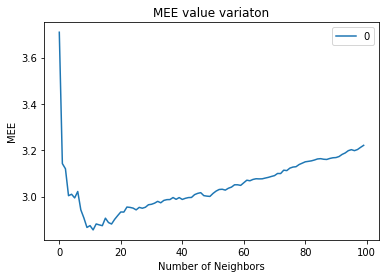

In [21]:
#plotting the rmse values against k values
curve = pd.DataFrame(mee_val) 
curve.plot()
plt.title("MEE value variaton")
plt.xlabel('Number of Neighbors')
plt.ylabel('MEE')

In [11]:
model = neighbors.KNeighborsRegressor(n_neighbors = 19)
model.fit(X_train, y_train)  #fit the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                    weights='uniform')

In [12]:
print('R2 with the best n value: ', model.score(X_test, y_test))

R2 with the best n value:  0.9579872514856794
